In [125]:
import tensorflow as tf
#tf.__version__

In [126]:
from PIL import Image
import numpy as np
import os,glob

In [127]:
# 모델을 불러들이기 위한 모듈
from tensorflow.compat.v2.keras.models import model_from_json

In [128]:
# json파일 읽어오기
json_file = open('libs/catdog_model.json')
load_model_json = json_file.read()
json_file.close()

In [129]:
#load_model_json => 모델화 하기

In [130]:
load_model = model_from_json(load_model_json)
#load_model

In [131]:
# 읽어온 모델에서 가중치 값 불러오기
load_model.load_weights("libs/model.h5")

In [132]:
# 실제 컴파일 하기 => binary_crossentropy 이진분류, adam 최적화
load_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
from tensorflow.python.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

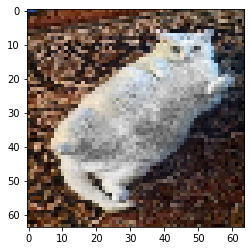

In [134]:
image = Image.open("./imgs/cat7.jpg")
width = 64
height = 64
color = 3 #색깔 갯수
image = image.resize((width, height))

plt.imshow(image)
plt.show()

In [140]:
# 이미지를 벡터화
image = np.array(image)
print(image.shape) #(150, 150, 3)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255
#print(x_test)

(64, 64, 3)


In [136]:
# 예측
y_predict = load_model.predict(x_test)

In [137]:
y_predict

array([[0.82372123]], dtype=float32)

In [138]:
print(y_predict.flatten()[0])

0.82372123


In [139]:
print("-------------------------------------------")
category = ""
if y_predict >= 0.5:
    category = "cat"
    print("cat", y_predict)
else:
    category = "doc"
    print("dog", y_predict)

-------------------------------------------
cat [[0.82372123]]
